# French C2C FTU Model Bias Analysis
mk4

### 1) Dependencies
### 2) Custom Functions
### 3) Import Data
### 4) Bias Analysis

## Import Dependencies

In [1]:
# !pip install researchpy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
import math
import os

In [4]:
from dataclasses import dataclass
from sklearn.metrics import confusion_matrix

In [5]:
warnings.filterwarnings('ignore')

%matplotlib inline

In [6]:
pd.options.display.max_columns = 250
pd.options.display.max_rows = 250

# Custom functions

#### Custom Save

In [7]:
def custom_save(name, data, kind=1):
    '''
    name : string
        designated filename
    data : data or pytorch model
        the data to save
    kind : int
        sentinel value - 1 if pytorch model, 0 otherwise
    
    custom_save stores the data passed into the function into a file with the provided name
    '''
    
    if kind == 1:
        ex = ".pth"
    else:
        ex = ".parquet"
    
    sentinel = True
    i = 1

    while sentinel:
        dirlist = os.listdir()

        if name not in dirlist:
            if kind == 1:
                torch.save(data, name)
            else:
                data.to_parquet(name)
            print(f"{name} has been saved.")                
            sentinel = False
        if name in dirlist:
            print(f"{name} already exists.", end=" ")
            temp, ext = name.split(ex)
            if "_v" in temp:
                temp, _ = temp.split("_v")
            name = f"{temp}_v{i}{ex}"
            i = i + 1
            print(f"Changing file name to: {name}")

#### Dataclass for confusion matrix results

In [8]:
@dataclass
class cmatrix:
    name: str
    TP: int
    FP: int
    TN: int
    FN: int    
    PPV: float
    TPR: float
    FDR: float
    FPR: float
    FOR: float
    FNR: float
    NPV: float
    TNR: float

#### Helper function to generate dataclass _cmatrix_

In [9]:
def gen_dataclass(actual, pred, name):
    [TN, FP, FN, TP] = confusion_matrix(actual, pred).ravel()
    

    PPV = TP / (TP + FP)  # positive predictive value
    FDR = FP / (TP + FP)  # false discovery rate
    
    TPR = TP / (TP + FN)  # true positive rate
    FNR = FN / (TP + FN)  # false negative rate
    
    TNR = TN / (TN + FP)  # true negative rate
    FPR = FP / (TN + FP)  # false positive rate

    FOR = FN / (TN + FN)  # false omission rate
    NPV = TN / (TN + FN)  # negative predictive value

    
    return cmatrix(name, TP, FP, TN, FN, PPV, TPR, FDR, FPR, FOR, FNR, NPV, TNR)

#### Extract bias metrics

In [10]:
def bias_metrics(df):
    '''
    - takes dataframe as input
    - returns dataclass whose components are statistical measures from a confusion matrix
    particular to relu, tanh, elu, and leaky relu dataframe series
    '''
    actual = df.target.values
    relu = df.pred_relu.values
    tanh = df.pred_tanh.values
    elu = df.pred_elu.values
    leaky = df.pred_leaky.values
    
    relu = gen_dataclass(actual, relu, "relu")
    tanh = gen_dataclass(actual, tanh, "tanh")
    elu = gen_dataclass(actual, elu, "elu")
    leaky = gen_dataclass(actual, leaky, "leaky")
    
    return relu, tanh, elu, leaky

# Import Data

In [11]:
data = pd.read_parquet("french_results_mk6_FTU.parquet")

source = "FrenchC2C_FTU"
suffix = "mk4"
name = f"{source}_stats_{suffix}.parquet"
tag = ["Ground", "Group A", "Group B"]

In [12]:
data.head()

,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniorityAsMonths,civGen_1,civGen_2,civGen_3,countryCode_ad,countryCode_ae,countryCode_af,countryCode_ag,countryCode_ai,countryCode_al,countryCode_am,countryCode_an,countryCode_ao,countryCode_aq,countryCode_ar,countryCode_as,countryCode_at,countryCode_au,countryCode_aw,countryCode_az,countryCode_ba,countryCode_bb,countryCode_bd,countryCode_be,countryCode_bf,countryCode_bg,countryCode_bh,countryCode_bj,countryCode_bl,countryCode_bm,countryCode_bn,countryCode_bo,countryCode_br,countryCode_bs,countryCode_bv,countryCode_bw,countryCode_by,countryCode_bz,countryCode_ca,countryCode_cd,countryCode_cf,countryCode_cg,countryCode_ch,countryCode_ci,countryCode_cl,countryCode_cm,countryCode_cn,countryCode_co,countryCode_cr,countryCode_cu,countryCode_cy,countryCode_cz,countryCode_de,countryCode_dj,countryCode_dk,countryCode_dm,countryCode_do,countryCode_dz,countryCode_ec,countryCode_ee,countryCode_eg,countryCode_er,countryCode_es,countryCode_et,countryCode_fi,countryCode_fj,countryCode_fk,countryCode_fo,countryCode_fr,countryCode_ga,countryCode_gb,countryCode_gd,countryCode_ge,countryCode_gg,countryCode_gh,countryCode_gi,countryCode_gm,countryCode_gn,countryCode_gp,countryCode_gr,countryCode_gs,countryCode_gt,countryCode_gu,countryCode_gy,countryCode_hk,countryCode_hn,countryCode_hr,countryCode_ht,countryCode_hu,countryCode_ic,countryCode_id,countryCode_ie,countryCode_il,countryCode_im,countryCode_in,countryCode_iq,countryCode_ir,countryCode_is,countryCode_it,countryCode_je,countryCode_jm,countryCode_jo,countryCode_jp,countryCode_ke,countryCode_kg,countryCode_kh,countryCode_ki,countryCode_kn,countryCode_kp,countryCode_kr,countryCode_kw,countryCode_ky,countryCode_kz,countryCode_la,countryCode_lb,countryCode_lc,countryCode_li,countryCode_lk,countryCode_lt,countryCode_lu,countryCode_lv,countryCode_ly,countryCode_ma,countryCode_mc,countryCode_md,countryCode_mg,countryCode_mk,countryCode_ml,countryCode_mm,countryCode_mn,countryCode_mo,countryCode_mq,countryCode_mr,countryCode_mt,countryCode_mu,countryCode_mv,countryCode_mx,countryCode_my,countryCode_na,countryCode_nc,countryCode_ne,countryCode_nf,countryCode_ng,countryCode_ni,countryCode_nl,countryCode_no,countryCode_np,countryCode_nz,countryCode_om,countryCode_pa,countryCode_pe,countryCode_pf,countryCode_ph,countryCode_pk,countryCode_pl,countryCode_pr,countryCode_pt,countryCode_pw,countryCode_py,countryCode_qa,countryCode_re,countryCode_ro,countryCode_rs,countryCode_ru,countryCode_rw,countryCode_sa,countryCode_se,countryCode_sg,countryCode_si,countryCode_sj,countryCode_sk,countryCode_sn,countryCode_sr,countryCode_sv,countryCode_sy,countryCode_sz,countryCode_tc,countryCode_td,countryCode_tg,countryCode_th,countryCode_tj,countryCode_tn,countryCode_tr,countryCode_tt,countryCode_tw,countryCode_tz,countryCode_ua,countryCode_ug,countryCode_um,countryCode_us,countryCode_uy,countryCode_uz,countryCode_vc,countryCode_ve,countryCode_vg,countryCode_vi,countryCode_vn,countryCode_vu,countryCode_ws,countryCode_yt,countryCode_za,countryCode_zm,countryCode_zw,language_de,language_en,language_es,language_fr,language_it,gender,target,pred_relu,pred_tanh,pred_elu,pred_leaky
0,3,8,0,0,0,0,0,0,0,0,0,1,699,106,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1,3,8,41,0,0,0,0,0,1,0,1,1,605,107,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [13]:
features = list(data.columns[-5:])
features

['target', 'pred_relu', 'pred_tanh', 'pred_elu', 'pred_leaky']

#### Inspect Data

**Note:** The following confusion matrix should return a list of four (4) numbers, with zero (0) false negatives and false positives. Example: array([100, 0, 0, 10])

In [14]:
confusion_matrix(data.target, data.target).ravel()

array([28048,     0,     0,  1626])

In [15]:
print("* * *French C2C Confusion Matrix, Tabular* * *")
print("-"*45)
print("Name\t    Total   TP     FP   TN     FN")
for f in features:
    total = data[f].shape[0]
    try:
        [tn, fp, fn, tp] = confusion_matrix(data.target, data[f]).ravel()
    except Exception:
        pass
    print(f"{f:10s}: {total:5.0f}  {tp:5.0f} {fp:5.0f} {tn:6.0f} {fn:5.0f}")

* * *French C2C Confusion Matrix, Tabular* * *
---------------------------------------------
Name	    Total   TP     FP   TN     FN
target    : 29674   1626     0  28048     0
pred_relu : 29674      0     0  28048  1626
pred_tanh : 29674    726   124  27924   900
pred_elu  : 29674    500    73  27975  1126
pred_leaky: 29674      0     0  28048  1626


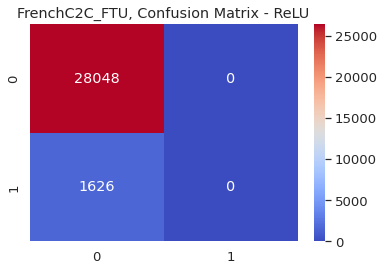

In [16]:
cm_relu = confusion_matrix(data.target, data.pred_relu)
sns.set(font_scale=1.2)
sns.heatmap(cm_relu, annot=True, cmap="coolwarm", robust=True, fmt='g')
plt.title(f"{source}, Confusion Matrix - ReLU")
plt.show()

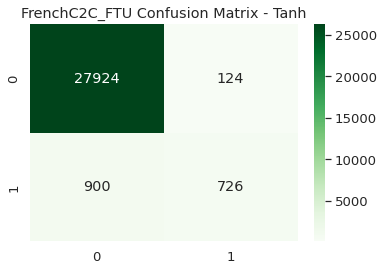

In [17]:
cm_tanh = confusion_matrix(data.target, data.pred_tanh)
sns.set(font_scale=1.2)
sns.heatmap(cm_tanh, annot=True, cmap="Greens", robust=True, fmt='g')
plt.title(f"{source} Confusion Matrix - Tanh")
plt.show()

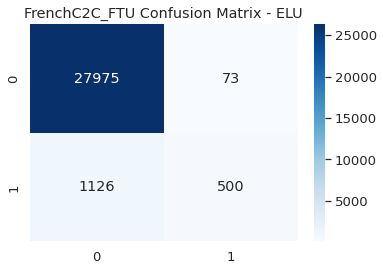

In [18]:
cm_elu = confusion_matrix(data.target, data.pred_elu)
sns.set(font_scale=1.2)
sns.heatmap(cm_elu, annot=True, cmap="Blues", robust=True, fmt='g')
plt.title(f"{source} Confusion Matrix - ELU")
plt.show()

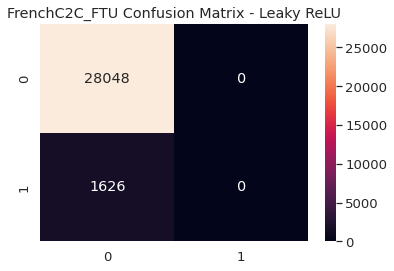

In [19]:
cm_leaky = confusion_matrix(data.target, data.pred_leaky)
sns.set(font_scale=1.2)
sns.heatmap(cm_leaky, annot=True, fmt='g')
plt.title(f"{source} Confusion Matrix - Leaky ReLU")
plt.show()

## Separate by protected feature

In [20]:
# group A : protected attribute
# group B : other
GroupA = data[data["gender"] == 1]
GroupB = data[data["gender"] == 0]
attribute = ["female", "male"]
protected_features = ["gender"]

In [21]:
Aset = GroupA.iloc[:,-5:]
Bset = GroupB.iloc[:,-5:]
base = data.iloc[:,-5:]

In [22]:
GroupA.shape

(22722, 227)

In [23]:
GroupB.shape

(6952, 227)

In [24]:
data.shape

(29674, 227)

##### Control stats, baseline

In [25]:
Cr, Ct, Ce, Cl = bias_metrics(data)

In [26]:
Ct.TPR

0.44649446494464945

##### Stats for Group A and Group B dataframes

In [27]:
Ar, At, Ae, Al = bias_metrics(GroupA)
Br, Bt, Be, Bl = bias_metrics(GroupB)

In [28]:
At.TPR

0.45868465430016864

# Bias Testing

#### Set α (alpha)

In [29]:
α = 0.01

#### Predictive parity

Compares precision (or positive predictive value, PPV) between group with protected attribute and without protected attribute. In this instance female group with male group

In [30]:
ppCA = [
    math.isclose(Cr.PPV, Ar.PPV, rel_tol=α),
    math.isclose(Ct.PPV, At.PPV, rel_tol=α),
    math.isclose(Ce.PPV, Ae.PPV, rel_tol=α),
    math.isclose(Cl.PPV, Al.PPV, rel_tol=α)
]

In [31]:
ppCB = [
    math.isclose(Cr.PPV, Br.PPV, rel_tol=α),
    math.isclose(Ct.PPV, Bt.PPV, rel_tol=α),
    math.isclose(Ce.PPV, Be.PPV, rel_tol=α),
    math.isclose(Cl.PPV, Bl.PPV, rel_tol=α)
]

In [32]:
ppAB = [
    math.isclose(Br.PPV, Ar.PPV, rel_tol=α),
    math.isclose(Bt.PPV, At.PPV, rel_tol=α),
    math.isclose(Be.PPV, Ae.PPV, rel_tol=α),
    math.isclose(Bl.PPV, Al.PPV, rel_tol=α)  
]

In [33]:
title = f"* * * Predictive Parity, {source} * * *"
t = len(title)
l = 60
offset = l//2 - t//2
print(" "*offset + title)
one = "G & A"
two = "G & B"
three = "A & B"
print(f"Name\t{one}\t{two}\t{three}\t{tag[0]:10s} {tag[1]:10s}{tag[2]:11s}")
print("-"*l)
print(f"{Ar.name}\t{ppCA[0]}\t{ppCB[0]}\t{ppAB[0]}\t{Cr.PPV:<10.5f} {Ar.PPV:<10.5f}{Br.PPV:<10.5f}")
print(f"{At.name}\t{ppCA[1]}\t{ppCB[1]}\t{ppAB[1]}\t{Ct.PPV:<10.5f} {At.PPV:<10.5f}{Bt.PPV:<10.5f}")
print(f"{Ae.name}\t{ppCA[2]}\t{ppCB[2]}\t{ppAB[2]}\t{Ce.PPV:<10.5f} {Ae.PPV:<10.5f}{Be.PPV:<10.5f}")
print(f"{Al.name}\t{ppCA[3]}\t{ppCB[3]}\t{ppAB[3]}\t{Cl.PPV:<10.5f} {Al.PPV:<10.5f}{Bl.PPV:<10.5f}")

        * * * Predictive Parity, FrenchC2C_FTU * * *
Name	G & A	G & B	A & B	Ground     Group A   Group B    
------------------------------------------------------------
relu	False	False	False	nan        nan       nan       
tanh	True	True	True	0.85412    0.85535   0.85047   
elu	True	True	True	0.87260    0.87126   0.87681   
leaky	False	False	False	nan        nan       nan       


In [34]:
Cr

cmatrix(name='relu', TP=0, FP=0, TN=28048, FN=1626, PPV=nan, TPR=0.0, FDR=nan, FPR=0.0, FOR=0.054795443822875246, FNR=1.0, NPV=0.9452045561771247, TNR=1.0)

#### Predictive Equality

Also called the False Positive Error Balance, this metric considers compares the false positive rates (FPR) between groups.

In [35]:
peCA = [
    math.isclose(Cr.FPR, Ar.FPR, rel_tol=α),
    math.isclose(Ct.FPR, At.FPR, rel_tol=α),
    math.isclose(Ce.FPR, Ae.FPR, rel_tol=α),
    math.isclose(Cl.FPR, Al.FPR, rel_tol=α)
]

In [36]:
peCB = [
    math.isclose(Cr.FPR, Br.FPR, rel_tol=α),
    math.isclose(Ct.FPR, Bt.FPR, rel_tol=α),
    math.isclose(Ce.FPR, Be.FPR, rel_tol=α),
    math.isclose(Cl.FPR, Bl.FPR, rel_tol=α)
]

In [37]:
peAB = [
    math.isclose(Br.FPR, Ar.FPR, rel_tol=α),
    math.isclose(Bt.FPR, At.FPR, rel_tol=α),
    math.isclose(Be.FPR, Ae.FPR, rel_tol=α),
    math.isclose(Bl.FPR, Al.FPR, rel_tol=α)  
]

In [38]:
title = f"* * * Predictive Equality, {source} * * *"
t = len(title)
l = 60
offset = l//2 - t//2
print(" "*offset + title)
one = "G & A"
two = "G & B"
three = "A & B"
print(f"Name\t{one}\t{two}\t{three}\t{tag[0]:10s} {tag[1]:10s}{tag[2]:11s}")
print("-"*l)
print(f"{Ar.name}\t{peCA[0]}\t{peCB[0]}\t{peAB[0]}\t{Cr.FPR:<10.5f} {Ar.FPR:<10.5f}{Br.FPR:<10.5f}")
print(f"{At.name}\t{peCA[1]}\t{peCB[1]}\t{peAB[1]}\t{Ct.FPR:<10.5f} {At.FPR:<10.5f}{Bt.FPR:<10.5f}")
print(f"{Ae.name}\t{peCA[2]}\t{peCB[2]}\t{peAB[2]}\t{Ce.FPR:<10.5f} {Ae.FPR:<10.5f}{Be.FPR:<10.5f}")
print(f"{Al.name}\t{peCA[3]}\t{peCB[3]}\t{peAB[3]}\t{Cl.FPR:<10.5f} {Al.FPR:<10.5f}{Bl.FPR:<10.5f}")

       * * * Predictive Equality, FrenchC2C_FTU * * *
Name	G & A	G & B	A & B	Ground     Group A   Group B    
------------------------------------------------------------
relu	True	True	True	0.00000    0.00000   0.00000   
tanh	False	False	False	0.00442    0.00427   0.00491   
elu	True	True	True	0.00260    0.00260   0.00261   
leaky	True	True	True	0.00000    0.00000   0.00000   


#### Equal opportunity

Equal Opportunity entails equal false negative rates (FNR) between groups. Mathematically, true postive rates (TPR) should also be equal.

In [39]:
eoCA = [
    math.isclose(Cr.FNR, Ar.FNR, rel_tol=α),
    math.isclose(Ct.FNR, At.FNR, rel_tol=α),
    math.isclose(Ce.FNR, Ae.FNR, rel_tol=α),
    math.isclose(Cl.FNR, Al.FNR, rel_tol=α)
]

In [40]:
eoCB = [
    math.isclose(Cr.FNR, Br.FNR, rel_tol=α),
    math.isclose(Ct.FNR, Bt.FNR, rel_tol=α),
    math.isclose(Ce.FNR, Be.FNR, rel_tol=α),
    math.isclose(Cl.FNR, Bl.FNR, rel_tol=α)
]

In [41]:
eoAB = [
    math.isclose(Br.FNR, Ar.FNR, rel_tol=α),
    math.isclose(Bt.FNR, At.FNR, rel_tol=α),
    math.isclose(Be.FNR, Ae.FNR, rel_tol=α),
    math.isclose(Bl.FNR, Al.FNR, rel_tol=α)  
]

In [42]:
title = f"* * * Equality Opportunity, {source} * * *"
t = len(title)
l = 60
offset = l//2 - t//2
print(" "*offset + title)
one = "G & A"
two = "G & B"
three = "A & B"
print(f"Name\t{one}\t{two}\t{three}\t{tag[0]:10s} {tag[1]:10s}{tag[2]:11s}")
print("-"*l)
print(f"{Ar.name}\t{eoCA[0]}\t{eoCB[0]}\t{eoAB[0]}\t{Cr.FNR:<10.5f} {Ar.FNR:<10.5f}{Br.FNR:<10.5f}")
print(f"{At.name}\t{eoCA[1]}\t{eoCB[1]}\t{eoAB[1]}\t{Ct.FNR:<10.5f} {At.FNR:<10.5f}{Bt.FNR:<10.5f}")
print(f"{Ae.name}\t{eoCA[2]}\t{eoCB[2]}\t{eoAB[2]}\t{Ce.FNR:<10.5f} {Ae.FNR:<10.5f}{Be.FNR:<10.5f}")
print(f"{Al.name}\t{eoCA[3]}\t{eoCB[3]}\t{eoAB[3]}\t{Cl.FNR:<10.5f} {Al.FNR:<10.5f}{Bl.FNR:<10.5f}")

       * * * Equality Opportunity, FrenchC2C_FTU * * *
Name	G & A	G & B	A & B	Ground     Group A   Group B    
------------------------------------------------------------
relu	True	True	True	1.00000    1.00000   1.00000   
tanh	False	False	False	0.55351    0.54132   0.58636   
elu	False	False	False	0.69250    0.68044   0.72500   
leaky	True	True	True	1.00000    1.00000   1.00000   


#### Statistical Parity

Statistical Parity compares the accuracy of different groups.

In [43]:
Ar_acc = (Ar.TP + Ar.TN) / (Ar.TP + Ar.TN + Ar.FP + Ar.FN)
At_acc = (At.TP + At.TN) / (At.TP + At.TN + At.FP + At.FN)
Ae_acc = (Ae.TP + Ae.TN) / (Ae.TP + Ae.TN + Ae.FP + Ae.FN)
Al_acc = (Al.TP + Al.TN) / (Al.TP + Al.TN + Al.FP + Al.FN)

In [44]:
Br_acc = (Br.TP + Br.TN) / (Br.TP + Br.TN +Br.FP + Br.FN)
Bt_acc = (Bt.TP + Bt.TN) / (Bt.TP + Bt.TN + Bt.FP + Bt.FN)
Be_acc = (Be.TP + Be.TN) / (Be.TP + Be.TN + Be.FP + Be.FN)
Bl_acc = (Bl.TP + Bl.TN) / (Bl.TP + Bl.TN + Bl.FP + Bl.FN)

In [45]:
Cr_acc = (Cr.TP + Cr.TN) / (Cr.TP + Cr.TN + Cr.FP + Cr.FN)
Ct_acc = (Ct.TP + Ct.TN) / (Ct.TP + Ct.TN + Ct.FP + Ct.FN)
Ce_acc = (Ce.TP + Ce.TN) / (Ce.TP + Ce.TN + Ce.FP + Ce.FN)
Cl_acc = (Cl.TP + Cl.TN) / (Cl.TP + Cl.TN + Cl.FP + Cl.FN)

In [46]:
spCA = [
    math.isclose(Cr_acc, Ar_acc, rel_tol=α),
    math.isclose(Ct_acc, At_acc, rel_tol=α),
    math.isclose(Ce_acc, Ae_acc, rel_tol=α),
    math.isclose(Cl_acc, Al_acc, rel_tol=α)  
]

In [47]:
spCB = [
    math.isclose(Cr_acc, Br_acc, rel_tol=α),
    math.isclose(Ct_acc, Bt_acc, rel_tol=α),
    math.isclose(Ce_acc, Be_acc, rel_tol=α),
    math.isclose(Cl_acc, Bl_acc, rel_tol=α)  
]

In [48]:
spAB = [
    math.isclose(Ar_acc, Br_acc, rel_tol=α),
    math.isclose(At_acc, Bt_acc, rel_tol=α),
    math.isclose(Ae_acc, Be_acc, rel_tol=α),
    math.isclose(Al_acc, Bl_acc, rel_tol=α)  
]

In [49]:
title = f"* * * Statistical Parity, {source} * * *"
t = len(title)
l = 68
offset = l//2 - t//2
print(" "*offset + title)
one = "Ground"
two = "Group A"
three = "Group B"
one = "G & A"
two = "G & B"
three = "A & B"
print(f"Name\t{one}\t{two}\t{three}\t{tag[0]:10s} {tag[1]:10s}{tag[2]:11s}")

print("-"*l)
print(f"{Ar.name}\t{spCA[0]}\t{spCB[0]}\t{spAB[0]}{Cr_acc:10.5f}\t{Ar_acc:10.5f}{Br_acc:10.5f}")
print(f"{At.name}\t{spCA[1]}\t{spCB[1]}\t{spAB[1]}{Ct_acc:10.5f}\t{At_acc:10.5f}{Br_acc:10.5f}")
print(f"{Ae.name}\t{spCA[2]}\t{spCB[2]}\t{spAB[2]}{Ce_acc:10.5f}\t{Ae_acc:10.5f}{Br_acc:10.5f}")
print(f"{Al.name}\t{spCA[3]}\t{spCB[3]}\t{spAB[2]}{Cl_acc:10.5f}\t{Al_acc:10.5f}{Br_acc:10.5f}")

            * * * Statistical Parity, FrenchC2C_FTU * * *
Name	G & A	G & B	A & B	Ground     Group A   Group B    
--------------------------------------------------------------------
relu	True	True	False   0.94520	   0.94780   0.93671
tanh	True	True	True   0.96549	   0.96770   0.93671
elu	True	True	False   0.95959	   0.96202   0.93671
leaky	True	True	False   0.94520	   0.94780   0.93671


In [50]:
Cacc_vis = [Cr_acc, Ct_acc, Ce_acc, Cl_acc]
Aacc_vis = [Ar_acc, At_acc, Ae_acc, Al_acc]
Bacc_vis = [Br_acc, Bt_acc, Be_acc, Bl_acc]

#### Compare Variances

In [51]:
np.var(Aset)

target        0.049472
pred_relu     0.000000
pred_tanh     0.027207
pred_elu      0.018778
pred_leaky    0.000000
dtype: float64

In [52]:
np.var(Bset)

target        0.059285
pred_relu     0.000000
pred_tanh     0.029835
pred_elu      0.019456
pred_leaky    0.000000
dtype: float64

In [53]:
np.var(base)

target        0.051793
pred_relu     0.000000
pred_tanh     0.027824
pred_elu      0.018937
pred_leaky    0.000000
dtype: float64

In [54]:
np.var(base) == np.var(Aset)

target        False
pred_relu      True
pred_tanh     False
pred_elu      False
pred_leaky     True
dtype: bool

In [55]:
np.var(base) == np.var(Bset)

target        False
pred_relu      True
pred_tanh     False
pred_elu      False
pred_leaky     True
dtype: bool

In [56]:
np.var(Aset) == np.var(Bset)

target        False
pred_relu      True
pred_tanh     False
pred_elu      False
pred_leaky     True
dtype: bool

## Selection Rates and Impact

#### Baseline

In [57]:
col = "target"
sr_A = Aset[Aset[col] == 1].shape[0] / data.shape[0]
sr_B = Bset[Bset[col] == 1].shape[0] / data.shape[0]
impact_base = min(sr_A, sr_B) / max(sr_A, sr_B)

In [58]:
print("Selection Rate and Impact - control")
print(f"{attribute[0].capitalize()}:\t{sr_A:0.5f}")
print(f"{attribute[1].capitalize()}:\t{sr_B:0.5f}")
print(f"Impact:\t{impact_base:0.5f}")

Selection Rate and Impact - control
Female:	0.03997
Male:	0.01483
Impact:	0.37099


#### ReLU

**NOTE:** Because ReLU and Leaky ReLU predicted zero (0) results, these metrics cannot be assertained due to division by zero (0)

In [59]:
col = "pred_relu"
sr_A_relu = Aset[Aset[col] == 1].shape[0] / data.shape[0]
sr_B_relu = Bset[Bset[col] == 1].shape[0] / data.shape[0]

try:
    impact_relu = min(sr_A_relu, sr_B_relu) / max(sr_A_relu, sr_B_relu)
except ZeroDivisionError:
    print("**Division by zero error -")
    print(f"SR for Group A, relu: {sr_A_relu}\nSR for Group B, relu: {sr_B_relu}\nimpact set to 0")
    impact_relu = 0

**Division by zero error -
SR for Group A, relu: 0.0
SR for Group B, relu: 0.0
impact set to 0


In [60]:
print("Selection Rate and Impact - ReLU")
print(f"{attribute[0].capitalize()}:\t{sr_A_relu:0.5f}")
print(f"{attribute[1].capitalize()}:\t{sr_B_relu:0.5f}")
print(f"Impact:\t{impact_relu:0.5f}")

Selection Rate and Impact - ReLU
Female:	0.00000
Male:	0.00000
Impact:	0.00000


#### Tanh

In [61]:
col = "pred_tanh"
sr_A_tanh = Aset[Aset[col] == 1].shape[0] / data.shape[0]
sr_B_tanh = Bset[Bset[col] == 1].shape[0] / data.shape[0]
impact_tanh = min(sr_A_tanh, sr_B_tanh) / max(sr_A_tanh, sr_B_tanh)

In [62]:
print("Selection Rate and Impact - Tanh")
print(f"{attribute[0].capitalize()}:\t{sr_A_tanh:0.5f}")
print(f"{attribute[1].capitalize()}:\t{sr_B_tanh:0.5f}")
print(f"Impact:\t{impact_tanh:0.5f}")

Selection Rate and Impact - Tanh
Female:	0.02143
Male:	0.00721
Impact:	0.33648


#### ELU

In [63]:
col = "pred_elu"
sr_A_elu = Aset[Aset[col] == 1].shape[0] / data.shape[0]
sr_B_elu = Bset[Bset[col] == 1].shape[0] / data.shape[0]
impact_elu = min(sr_A_elu, sr_B_elu) / max(sr_A_elu, sr_B_elu)

In [64]:
print("Selection Rate and Impact - elu")
print(f"{attribute[0].capitalize()}:\t{sr_A_elu:0.5f}")
print(f"{attribute[1].capitalize()}:\t{sr_B_elu:0.5f}")
print(f"Impact:\t{impact_elu:0.5f}")

Selection Rate and Impact - elu
Female:	0.01466
Male:	0.00465
Impact:	0.31724


#### Leaky ReLU

In [65]:
col = "pred_leaky"
sr_A_leaky = Aset[Aset[col] == 1].shape[0] / data.shape[0]
sr_B_leaky = Bset[Bset[col] == 1].shape[0] / data.shape[0]

try:
    impact_leaky = min(sr_A_leaky, sr_B_leaky) / max(sr_A_leaky, sr_B_leaky)
except ZeroDivisionError:
    print("**Division by zero error -")
    print(f"SR for Group A, leaky: {sr_A_leaky}\nSR for Group B, leaky: {sr_B_leaky}\nimpact set to 0")
    impact_leaky = 0

**Division by zero error -
SR for Group A, leaky: 0.0
SR for Group B, leaky: 0.0
impact set to 0


In [66]:
print("Selection Rate and Impact - leaky")
print(f"{attribute[0].capitalize()}:\t{sr_A_leaky:0.5f}")
print(f"{attribute[1].capitalize()}:\t{sr_B_leaky:0.5f}")
print(f"Impact:\t{impact_leaky:0.5f}")

Selection Rate and Impact - leaky
Female:	0.00000
Male:	0.00000
Impact:	0.00000


# Hypothesis Testing

In [67]:
import shap

import Levenshtein as lev

from pyjarowinkler import distance as dist
from scipy.stats import binom, chisquare, kstest
from statsmodels.stats.weightstats import ztest

#### Hypothesis test function

In [68]:
def hypothesis_test(p, α=0.05):
    if p >= α:
        res = "Fail to reject"
    if p < α:
        res = "Reject"
        
    return res

In [69]:
fs = ["Actual", "ReLU", "Tanh", "ELU", "Leaky ReLU"]
tag = ["Ground", "Group A", "Group B"]
data_list =[base, Aset, Bset]

### Z-tests

In [70]:
title = "* * * French C2C Z-tests * * *"
t = len(title)
l = 57
offset = l//2 - t//2
print(" "*offset + title)
print("      Groups\t     Z-score\t P-val \t   Results")
print("-"*l)

for n1, d1 in zip(tag, data_list):
    for n2, d2 in zip(tag, data_list):
        (z, p) = ztest(d1.target, d2.target)
        print(f"{n1:7s} x {n2:8s}: {z:>8.5f}\t{p:>8.5f}   {hypothesis_test(p, α)}")
    print()

             * * * French C2C Z-tests * * *
      Groups	     Z-score	 P-val 	   Results
---------------------------------------------------------
Ground  x Ground  :  0.00000	 1.00000   Fail to reject
Ground  x Group A :  1.30841	 0.19074   Fail to reject
Ground  x Group B : -2.76387	 0.00571   Reject

Group A x Ground  : -1.30841	 0.19074   Fail to reject
Group A x Group A :  0.00000	 1.00000   Fail to reject
Group A x Group B : -3.55764	 0.00037   Reject

Group B x Ground  :  2.76387	 0.00571   Reject
Group B x Group A :  3.55764	 0.00037   Reject
Group B x Group B :  0.00000	 1.00000   Fail to reject



### Selection Rates and Impact Results

In [71]:
title = f"* * * Selection Rate and Impact, {source} * * *"
t = len(title)
l = 51
offset = l//2 - t//2

print(" "*offset + title)
print("Group\tBase\t ReLU\t  Tanh\t   ELU\t    Leaky")
print("-" * l)

print(f"{attribute[0].capitalize()}: {sr_A:0.5f}  {sr_A_relu:0.5f}  {sr_A_tanh:0.5f}  {sr_A_elu:0.5f}  {sr_A_leaky:0.5f}")
print(f"{attribute[1].capitalize()}  : {sr_B:0.5f}  {sr_B_relu:0.5f}  {sr_B_tanh:0.5f}  {sr_B_elu:0.5f}  {sr_B_leaky:0.5f}")
print(f"Impact: {impact_base:0.5f}  {impact_relu:0.5f}  {impact_tanh:0.5f}  {impact_elu:0.5f}  {impact_leaky:0.5f}")

* * * Selection Rate and Impact, FrenchC2C_FTU * * *
Group	Base	 ReLU	  Tanh	   ELU	    Leaky
---------------------------------------------------
Female: 0.03997  0.00000  0.02143  0.01466  0.00000
Male  : 0.01483  0.00000  0.00721  0.00465  0.00000
Impact: 0.37099  0.00000  0.33648  0.31724  0.00000


## Similarity Metrics

#### Convert to string

In [72]:
Astr = [[""] * Aset.shape[0]] * Aset.shape[1]
Bstr = [[""] * Bset.shape[0]] * Bset.shape[1]

In [73]:
for f in range(len(features)):
    Astr[f] = ''.join(GroupA[features[f]].values.astype('int').astype('str'))
    Bstr[f] = ''.join(GroupB[features[f]].values.astype('int').astype('str'))

#### Test defaults
Levenshtein result should be 0

In [74]:
lev.distance(Astr[1], Astr[1])

0

Jaro similarity result should be 1.0

In [75]:
dist.get_jaro_distance(Astr[1], Astr[1])

1.0

In [76]:
for i, f in enumerate(features):
    print(f"{f:10s} : {i}")

target     : 0
pred_relu  : 1
pred_tanh  : 2
pred_elu   : 3
pred_leaky : 4


In [77]:
print("Similarity and Distance Metrics\n" \
      f"     Between {attribute[0].capitalize()} and {attribute[1].capitalize()}")
print("*" * 31)
print("Function\tLev.\tJaro\t  Jaro-Winkler")
for i, f in enumerate(features):
    print(f"{f:10s}:\t{lev.distance(Astr[i], Bstr[i])}\t" \
          f"{dist.get_jaro_distance(Astr[i], Bstr[i], winkler=False):7.5f}\t" \
          f"{dist.get_jaro_distance(Astr[i], Bstr[i], winkler=True):9.5f}")
    

Similarity and Distance Metrics
     Between Female and Male
*******************************
Function	Lev.	Jaro	  Jaro-Winkler
target    :	15770	0.74856	  0.85000
pred_relu :	15770	0.76865	  0.86000
pred_tanh :	15770	0.75854	  0.86000
pred_elu  :	15770	0.76204	  0.86000
pred_leaky:	15770	0.76865	  0.86000


## Distribution Tests

Test results for shape of distribution

In [78]:
for f in features:
    test = data[f]

    x = test.values
    n = test.sum()
    p = n / test.shape[0]

    stat, pval = kstest(rvs=x, cdf=binom.cdf(x, n, p))
    print(f"Binom  - {test.name:10}:{stat:14.5f}{pval:8.2f}", end="")
    if stat > 0.5:
        print("  X")
    else:
        print()

    stat, pval = kstest(rvs=x, cdf='norm')
    print(f"Norm   - {test.name:10}:{stat:14.5f}{pval:8.2f}", end="")    
    if stat > 0.5:
        print("  X")
    else:
        print()
    
    freqB = data.target.sum()
    stat, pval = chisquare([n, freqB])
    print(f"Chi^2  - {test.name:10}:{stat:14.5f}{pval:8.2f}", end="")
    if pval > stat:
        print("  same as actual\n")
    else:
        print("\n")

Binom  - target    :       0.94520    0.00  X
Norm   - target    :       0.50000    0.00
Chi^2  - target    :       0.00000    1.00  same as actual

Binom  - pred_relu :       1.00000    0.00  X
Norm   - pred_relu :       0.50000    0.00
Chi^2  - pred_relu :    1626.00000    0.00

Binom  - pred_tanh :       0.97136    0.00  X
Norm   - pred_tanh :       0.50000    0.00
Chi^2  - pred_tanh :     243.20517    0.00

Binom  - pred_elu  :       0.98069    0.00  X
Norm   - pred_elu  :       0.50000    0.00
Chi^2  - pred_elu  :     504.23329    0.00

Binom  - pred_leaky:       1.00000    0.00  X
Norm   - pred_leaky:       0.50000    0.00
Chi^2  - pred_leaky:    1626.00000    0.00



# Descriptive Statistics

In [79]:
def get_stats(df, src, func):
    n = df.shape[0]
    k = df.sum()
    p = k / n
    q = 1 - p
    
    mean, var, skew, kurt = binom.stats(n, p, moments="mvsk")
    std = np.std(df.values)
    
    return [src, func, float(mean), float(std), float(var), float(skew), float(kurt)]

In [80]:
cols = ["Source", "Function", "Mean", "STD", "Variance", "Skew", "Kurtosis"]

In [81]:
df = pd.DataFrame(columns=cols)

for i, d in enumerate(data_list):
    for j, f in enumerate(fs):
        temp = get_stats(d[features[j]], tag[i], f)
        tmp = pd.Series(temp, index=df.columns)
        df = df.append(tmp, ignore_index=True)

In [82]:
l = 56
title = f"* * * {source} Baseline Descriptive Statistics * * *"
t = len(title)
offset = l//2 - t//2


print(" "*offset, title)
print("-"*(l+2))
display(df)

 * * * FrenchC2C_FTU Baseline Descriptive Statistics * * *
----------------------------------------------------------


,Source,Function,Mean,STD,Variance,Skew,Kurtosis
0,Ground,Actual,1626.0,0.227581,1536.902608,0.022713,0.000448
1,Ground,ReLU,0.0,0.0,0.0,inf,inf
2,Ground,Tanh,850.0,0.166806,825.652086,0.032808,0.001009
3,Ground,ELU,573.0,0.137612,561.935465,0.040556,0.001577
4,Ground,Leaky ReLU,0.0,0.0,0.0,inf,inf
5,Group A,Actual,1186.0,0.222422,1124.095414,0.026713,0.000626
6,Group A,ReLU,0.0,0.0,0.0,inf,inf
7,Group A,Tanh,636.0,0.164946,618.198046,0.037968,0.001354
8,Group A,ELU,435.0,0.137033,426.672168,0.046558,0.00208
9,Group A,Leaky ReLU,0.0,0.0,0.0,inf,inf


### Save descriptive stats

In [83]:
custom_save(name, df, 0)

FrenchC2C_FTU_stats_mk4.parquet has been saved.


# Appendix:  Examples of Similarity Metrics

In [ ]:
from itertools import permutations

In [ ]:
x = 3
perm_gen = "0" * x + "1"*x
list(perm_gen)

In [ ]:
perm = permutations(list(perm_gen))
words = []
for i in list(perm):
    if i not in words:
        tmp = ''.join(str(e) for e in i)
    if tmp not in words:
        words.append(tmp)
        print(f"{i} : {tmp}")

In [ ]:
cache = []
size = 8 + 2*len(words[0])
lbls = ["Permutation", "Lev", "Jaro", "Jaro-Winkler"]
print(f"{lbls[0]:{size}s}" +\
      f"{lbls[1]:5s}" +\
      f"{lbls[2]:10s}" +\
      f"{lbls[3]}")

for first in words:
    if first is not words[0]:
        print()
    for second in words:
        temp = f"{first} x {second}"
        temp2 = f"{second} x {first}"
        if (temp not in cache) and (temp2 not in cache):
            cache.append(temp)
            levd = lev.distance(first,second)
            jaro = dist.get_jaro_distance(first, second)
            jw = dist.get_jaro_distance(first, second, winkler=False)
            print(f"{first} x {second} : {levd:3d}{jaro:11.5f}{jw:10.5f}")